___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Example for Sine Wave

In [89]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

Let's use Numpy to create a simple sine wave.

In [92]:
x = np.linspace(0,50,501)
y = np.tan(x)

In [93]:
x

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [94]:
y

array([ 0.00000000e+00,  1.00334672e-01,  2.02710036e-01,  3.09336250e-01,
        4.22793219e-01,  5.46302490e-01,  6.84136808e-01,  8.42288380e-01,
        1.02963856e+00,  1.26015822e+00,  1.55740772e+00,  1.96475966e+00,
        2.57215162e+00,  3.60210245e+00,  5.79788372e+00,  1.41014199e+01,
       -3.42325327e+01, -7.69660214e+00, -4.28626167e+00, -2.92709751e+00,
       -2.18503986e+00, -1.70984654e+00, -1.37382306e+00, -1.11921364e+00,
       -9.16014290e-01, -7.47022297e-01, -6.01596613e-01, -4.72727629e-01,
       -3.55529832e-01, -2.46405394e-01, -1.42546543e-01, -4.16166546e-02,
        5.84738545e-02,  1.59745748e-01,  2.64316901e-01,  3.74585640e-01,
        4.93466730e-01,  6.24733075e-01,  7.73556091e-01,  9.47424650e-01,
        1.15782128e+00,  1.42352648e+00,  1.77777977e+00,  2.28584788e+00,
        3.09632378e+00,  4.63733205e+00,  8.86017490e+00,  8.07127630e+01,
       -1.13848707e+01, -5.26749307e+00, -3.38051501e+00, -2.44938942e+00,
       -1.88564188e+00, -

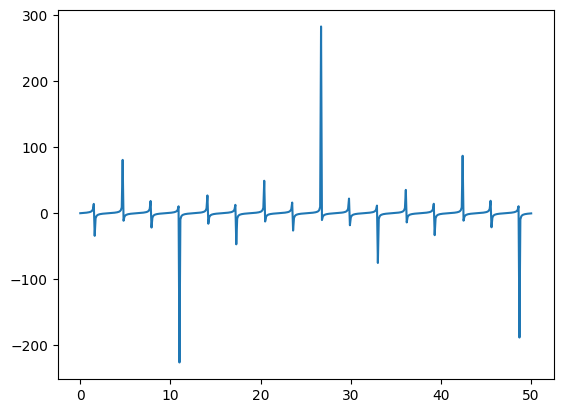

In [95]:
plt.plot(x,y)

Let's turn this into a DataFrame

In [149]:
df = pd.DataFrame(data=y,index=x,columns=['Tan'])

ValueError: Shape of passed values is (1, 1), indices imply (501, 1)

In [150]:
df

,Cos
0.0,0.000000
0.1,0.100335
0.2,0.202710
0.3,0.309336
0.4,0.422793
...,...
49.6,-0.784927
49.7,-0.634613
49.8,-0.502296
49.9,-0.382675


## Train Test Split

Note! This is very different from our usual test/train split methodology!

In [151]:
len(df)

501

In [152]:
test_percent = 0.1

In [153]:
len(df)*test_percent

50.1

In [154]:
test_point = np.round(len(df)*test_percent)

In [155]:
test_ind = int(len(df) - test_point)

In [156]:
test_ind

451

In [157]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [158]:
train

,Cos
0.0,0.000000
0.1,0.100335
0.2,0.202710
0.3,0.309336
0.4,0.422793
...,...
44.6,0.710447
44.7,0.873012
44.8,1.066790
44.9,1.307024


In [159]:
test

,Cos
45.1,2.053911
45.2,2.713423
45.3,3.866382
45.4,6.480846
45.5,18.817004
45.6,-21.303359
45.7,-6.758010
45.8,-3.967477
45.9,-2.766047
46.0,-2.086614


## Scale Data

In [160]:
from sklearn.preprocessing import MinMaxScaler

In [161]:
scaler = MinMaxScaler()

In [162]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [163]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [164]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [165]:
# scaled_train

In [166]:
# define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 #Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=batch_size)

In [167]:
len(scaled_train)

451

In [168]:
len(generator) # n_input = 2

449

In [169]:
# scaled_train

In [170]:
# What does the first batch look like?
X,y = generator[0]

In [171]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.44423356 0.44443083]
Predict this y: 
 [[0.4446321]]


In [172]:
# Let's redefine to get 10 steps back and then predict the next step out
length = 10 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [173]:
# What does the first batch look like?
X,y = generator[0]

In [174]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.44423356 0.44443083 0.4446321  0.44484174 0.4450648  0.44530763
 0.44557862 0.44588955 0.4462579  0.44671111]
Predict this y: 
 [[0.44729552]]


In [175]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

Now you will be able to edit the length so that it makes sense for your time series!

### Create the Model

In [176]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,SimpleRNN

In [177]:
# We're only using one feature in our time series
n_features = 1

In [178]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [179]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [180]:
# fit model
model.fit(generator,epochs=3)

Epoch 1/3
 22/401 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2356

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0291
Epoch 2/3
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0011
Epoch 3/3
401/401 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0031


In [181]:
model.history.history.keys()

dict_keys(['loss'])

<Axes: >

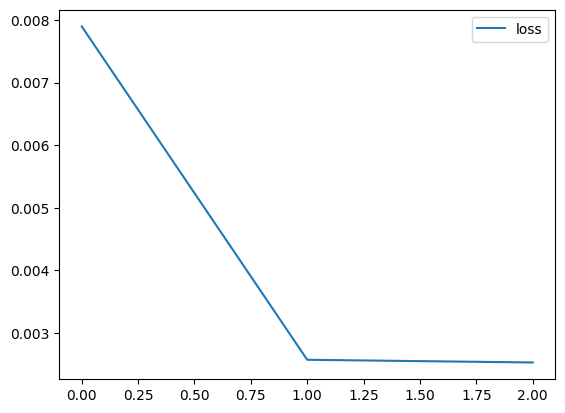

In [182]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Evaluate on Test Data

In [183]:
first_eval_batch = scaled_train[-length:]

In [184]:
first_eval_batch

array([[0.44243583],
       [0.44276759],
       [0.44305316],
       [0.44330628],
       [0.44353653],
       [0.44375096],
       [0.44395509],
       [0.44415349],
       [0.44435028],
       [0.44454942],
       [0.44475509],
       [0.44497201],
       [0.44520592],
       [0.44546425],
       [0.44575721],
       [0.44609957],
       [0.446514  ],
       [0.44703759],
       [0.44773606],
       [0.44873857],
       [0.45033967],
       [0.45339031],
       [0.46179315],
       [0.61517577],
       [0.42207598],
       [0.4339273 ],
       [0.43760889],
       [0.4394301 ],
       [0.44053421],
       [0.44128764],
       [0.44184413],
       [0.44227965],
       [0.4426362 ],
       [0.44293899],
       [0.44320426],
       [0.44344305],
       [0.44366332],
       [0.44387113],
       [0.44407139],
       [0.44426837],
       [0.44446605],
       [0.44466847],
       [0.44488008],
       [0.44510614],
       [0.44535326],
       [0.44563034],
       [0.44594996],
       [0.446

In [185]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

In [186]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step


array([[0.47463414]], dtype=float32)

In [187]:
scaled_test[0]

array([0.44827168])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [188]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [189]:
current_batch.shape

(1, 50, 1)

In [190]:
current_batch

array([[[0.44243583],
        [0.44276759],
        [0.44305316],
        [0.44330628],
        [0.44353653],
        [0.44375096],
        [0.44395509],
        [0.44415349],
        [0.44435028],
        [0.44454942],
        [0.44475509],
        [0.44497201],
        [0.44520592],
        [0.44546425],
        [0.44575721],
        [0.44609957],
        [0.446514  ],
        [0.44703759],
        [0.44773606],
        [0.44873857],
        [0.45033967],
        [0.45339031],
        [0.46179315],
        [0.61517577],
        [0.42207598],
        [0.4339273 ],
        [0.43760889],
        [0.4394301 ],
        [0.44053421],
        [0.44128764],
        [0.44184413],
        [0.44227965],
        [0.4426362 ],
        [0.44293899],
        [0.44320426],
        [0.44344305],
        [0.44366332],
        [0.44387113],
        [0.44407139],
        [0.44426837],
        [0.44446605],
        [0.44466847],
        [0.44488008],
        [0.44510614],
        [0.44535326],
        [0

In [191]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.44276759],
        [ 0.44305316],
        [ 0.44330628],
        [ 0.44353653],
        [ 0.44375096],
        [ 0.44395509],
        [ 0.44415349],
        [ 0.44435028],
        [ 0.44454942],
        [ 0.44475509],
        [ 0.44497201],
        [ 0.44520592],
        [ 0.44546425],
        [ 0.44575721],
        [ 0.44609957],
        [ 0.446514  ],
        [ 0.44703759],
        [ 0.44773606],
        [ 0.44873857],
        [ 0.45033967],
        [ 0.45339031],
        [ 0.46179315],
        [ 0.61517577],
        [ 0.42207598],
        [ 0.4339273 ],
        [ 0.43760889],
        [ 0.4394301 ],
        [ 0.44053421],
        [ 0.44128764],
        [ 0.44184413],
        [ 0.44227965],
        [ 0.4426362 ],
        [ 0.44293899],
        [ 0.44320426],
        [ 0.44344305],
        [ 0.44366332],
        [ 0.44387113],
        [ 0.44407139],
        [ 0.44426837],
        [ 0.44446605],
        [ 0.44466847],
        [ 0.44488008],
        [ 0.44510614],
        [ 0

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [192]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━

In [193]:
test_predictions

[array([0.47463414], dtype=float32),
 array([0.47380018], dtype=float32),
 array([0.47940493], dtype=float32),
 array([0.4649211], dtype=float32),
 array([0.4659854], dtype=float32),
 array([0.47659633], dtype=float32),
 array([0.4737893], dtype=float32),
 array([0.4816958], dtype=float32),
 array([0.48245272], dtype=float32),
 array([0.480644], dtype=float32),
 array([0.48485956], dtype=float32),
 array([0.48619515], dtype=float32),
 array([0.48161885], dtype=float32),
 array([0.48877472], dtype=float32),
 array([0.47771746], dtype=float32),
 array([0.4920303], dtype=float32),
 array([0.48649266], dtype=float32),
 array([0.49073964], dtype=float32),
 array([0.49395704], dtype=float32),
 array([0.48657802], dtype=float32),
 array([0.4910814], dtype=float32),
 array([0.4850121], dtype=float32),
 array([0.49308312], dtype=float32),
 array([0.4923907], dtype=float32),
 array([0.49252984], dtype=float32),
 array([0.48823908], dtype=float32),
 array([0.48982576], dtype=float32),
 array([0.4

In [194]:
scaled_test

array([[0.44827168],
       [0.44956832],
       [0.45183511],
       [0.45697531],
       [0.48122897],
       [0.40234982],
       [0.43094689],
       [0.43643325],
       [0.43879534],
       [0.44013115],
       [0.44100446],
       [0.44163066],
       [0.44211   ],
       [0.44249561],
       [0.44281839],
       [0.44309769],
       [0.44334638],
       [0.44357353],
       [0.44378587],
       [0.44398873],
       [0.44418658],
       [0.44438349],
       [0.44458343],
       [0.44479064],
       [0.44500998],
       [0.44524741],
       [0.44551076],
       [0.44581083],
       [0.44616344],
       [0.44659309],
       [0.44714037],
       [0.44787832],
       [0.44895351],
       [0.45071103],
       [0.45420428],
       [0.46493547],
       [0.07425   ],
       [0.42563403],
       [0.4347926 ],
       [0.43799542],
       [0.43965142],
       [0.44067972],
       [0.44139229],
       [0.44192438],
       [0.44234429],
       [0.44269034],
       [0.44298587],
       [0.443

## Inverse Transformations and Compare

In [195]:
true_predictions = scaler.inverse_transform(test_predictions)

In [196]:
true_predictions

array([[15.46266947],
       [15.0384926 ],
       [17.88923769],
       [10.52231175],
       [11.06364772],
       [16.46069704],
       [15.03295979],
       [19.054447  ],
       [19.43943947],
       [18.51946238],
       [20.66363003],
       [21.34295271],
       [19.01530807],
       [22.65500122],
       [17.03094004],
       [24.31088721],
       [21.49427879],
       [23.65442336],
       [25.29089147],
       [21.53769238],
       [23.82824448],
       [20.74122576],
       [24.84638721],
       [24.49419747],
       [24.56497193],
       [22.38255971],
       [23.18959172],
       [23.24611731],
       [22.75680489],
       [24.85125305],
       [22.58016431],
       [23.43606694],
       [22.11953154],
       [22.25106078],
       [22.59382201],
       [22.23361349],
       [21.93091585],
       [22.1122252 ],
       [21.63854107],
       [21.92698983],
       [22.08306049],
       [20.54309061],
       [21.29183866],
       [19.95552158],
       [21.20661826],
       [21

In [197]:
test

,Cos
45.1,2.053911
45.2,2.713423
45.3,3.866382
45.4,6.480846
45.5,18.817004
45.6,-21.303359
45.7,-6.758010
45.8,-3.967477
45.9,-2.766047
46.0,-2.086614


In [198]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

<ipython-input-198-53e06c23926f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [199]:
test

,Cos,Predictions
45.1,2.053911,15.462669
45.2,2.713423,15.038493
45.3,3.866382,17.889238
45.4,6.480846,10.522312
45.5,18.817004,11.063648
45.6,-21.303359,16.460697
45.7,-6.758010,15.032960
45.8,-3.967477,19.054447
45.9,-2.766047,19.439439
46.0,-2.086614,18.519462


<Axes: >

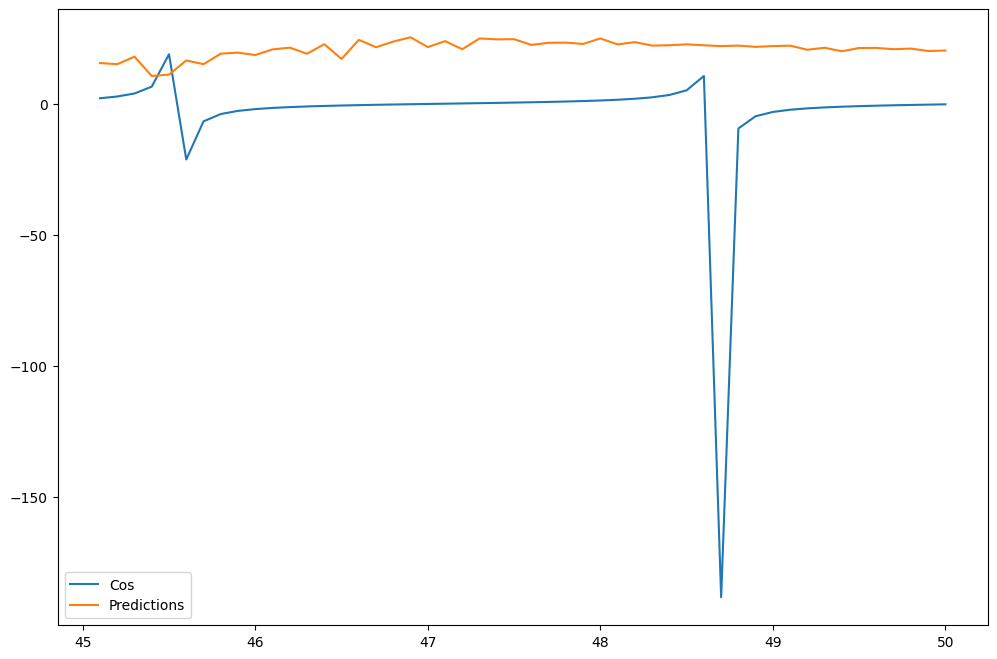

In [201]:
test.plot(figsize=(12,8))

## Adding in Early Stopping and Validation Generator

In [202]:
from tensorflow.keras.callbacks import EarlyStopping

In [203]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [204]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length=length,batch_size=1)


validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,batch_size=1)

# LSTMS

In [205]:
# define model
model = Sequential()

# Simple RNN layer
model.add(LSTM(50,input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [206]:
model.fit(generator,epochs=20,
                   validation_data=validation_generator,
                   callbacks=[early_stop])

Epoch 1/20
  7/402 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 0.3750

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


402/402 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 0.0329 - val_loss: 3.2314e-05
Epoch 2/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0011 - val_loss: 1.4220e-05
Epoch 3/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0013 - val_loss: 5.1247e-06
Epoch 4/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 5.6969e-04 - val_loss: 4.1768e-05
Epoch 5/20
402/402 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0026 - val_loss: 1.9716e-05


In [207]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    test_predictions.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

<ipython-input-208-914eb3146fc5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


<Axes: >

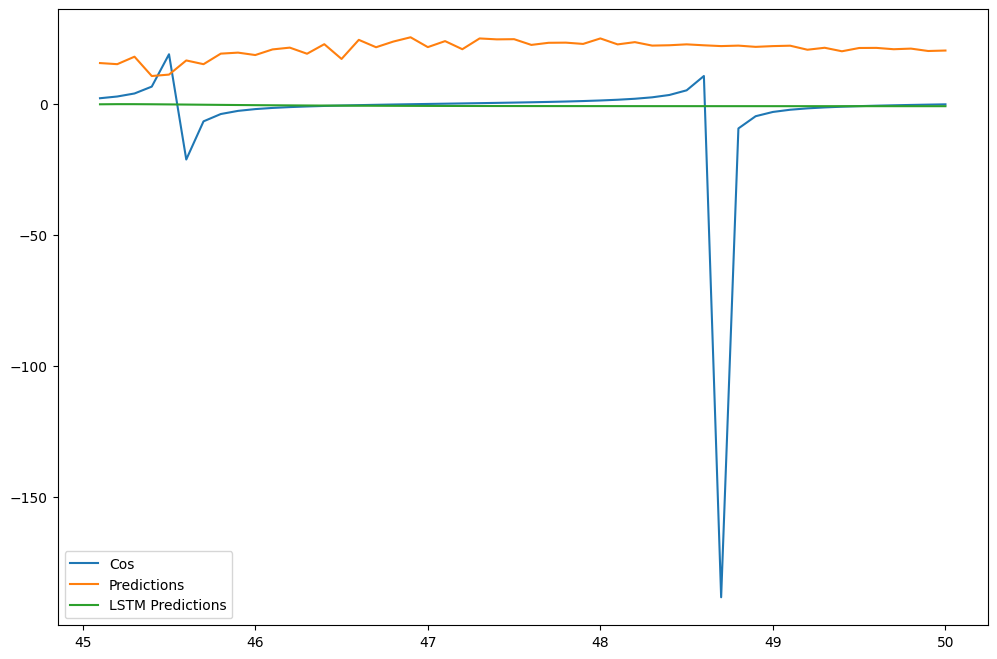

In [208]:
# IGNORE WARNINGS
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

# Forecasting

Forecast into unknown range. We should first utilize all our data, since we are now forecasting!

In [209]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [210]:
length = 50 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [211]:
model = Sequential()
model.add(LSTM(50, input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator,epochs=6)

Epoch 1/6


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 12/451 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.1150

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0111
Epoch 2/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0021
Epoch 3/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 9.0383e-04
Epoch 4/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0026
Epoch 5/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0021
Epoch 6/6
451/451 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - loss: 0.0019


In [212]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store prediction
    forecast.append(current_pred)

    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

In [213]:
forecast = scaler.inverse_transform(forecast)

In [214]:
# forecast

In [215]:
df

,Cos
0.0,0.000000
0.1,0.100335
0.2,0.202710
0.3,0.309336
0.4,0.422793
...,...
49.6,-0.784927
49.7,-0.634613
49.8,-0.502296
49.9,-0.382675


In [216]:
len(forecast)

50

In [217]:
50*0.1

5.0

In [218]:
forecast_index = np.arange(50.1,55.1,step=0.1)

In [219]:
len(forecast_index)

50

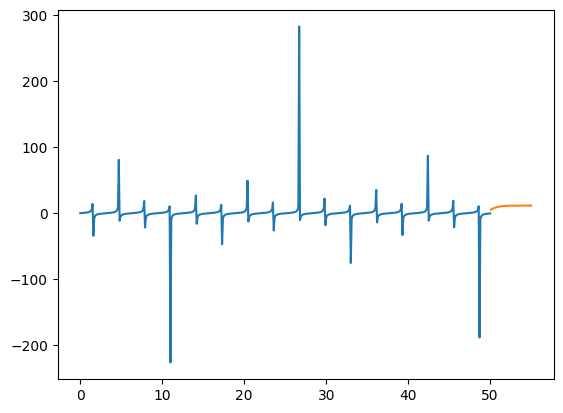

In [220]:
plt.plot(df.index,df['Cos'])
plt.plot(forecast_index,forecast)

# Great Job!